<a href="https://colab.research.google.com/github/JoumanaMaki/CNN-for-emotions-classification/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Emotion detection of only angry and happy images



## Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import zipfile
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential

In [3]:
tf.__version__

'2.17.0'

## Loading the images

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/fer2013_2_classes.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

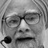

In [6]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Angry/1.jpg')

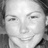

In [7]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Happy/1.jpg')

## Train and test set

In [8]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range= 7,
                                     horizontal_flip=True,
                                    zoom_range = 0.2 )
train_dataset = train_generator.flow_from_directory('/content/fer2013_2_classes/train',
                                                  target_size=(48,48),
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                    shuffle = True)


Found 11210 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [12]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1], dtype=int32), array([3995, 7215]))

In [23]:
test_generator = ImageDataGenerator(rescale=1/255)
test_dataset = test_generator.flow_from_directory('/content/fer2013_2_classes/validation',
                                                  target_size=(48,48),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                    )

Found 1370 images belonging to 2 classes.


In [15]:
test_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [16]:
np.unique(test_dataset.classes, return_counts=True)

(array([0, 1], dtype=int32), array([491, 879]))

In [19]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

<Axes: ylabel='count'>

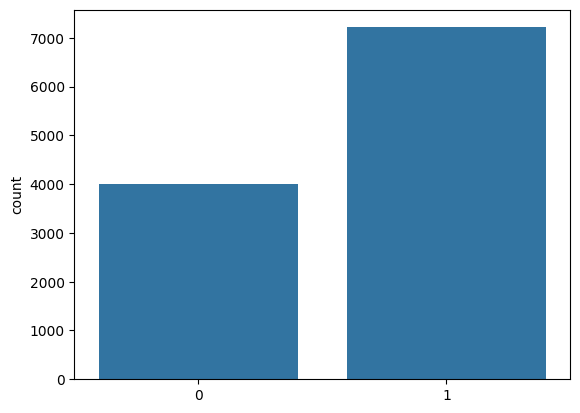

In [20]:
sns.countplot(x =train_dataset.classes)


<Axes: ylabel='count'>

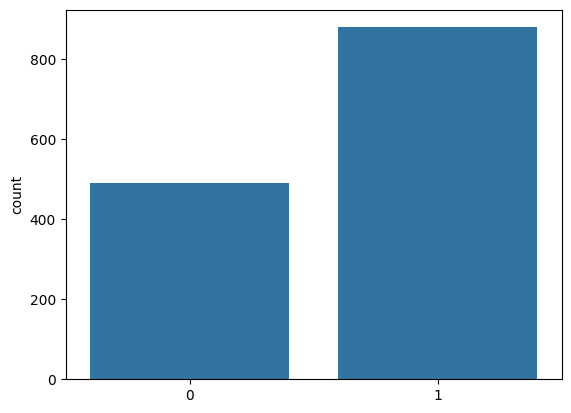

In [21]:
sns.countplot(x=test_dataset.classes)

## Build and train the neural network

In [32]:
num_detectors= 32 #nb of filters
num_classes = 2
width, height = 48, 48
epochs = 5

network = Sequential()
#for padding we have same and valid ( valid we might ignore some info)
network.add(Conv2D(num_detectors, (3,3), activation = 'relu',padding='same', input_shape = (width, height, 3)))
network.add(BatchNormalization()) #to normalize the values between layers
network.add(Conv2D(num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2)) #0.2 means we are not going to use 20% of the neurons in the layer



network.add(Conv2D(2 * num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization()) #to normalize the values between layers
network.add(Conv2D(2*num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2 *2* num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization()) #to normalize the values between layers
network.add(Conv2D(2*2*num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2 *2* 2*num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization()) #to normalize the values between layers
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation = 'relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation = 'softmax'))

#network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
network.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,328,418 (5.07 MB)

 Trainable params: 1,326,242 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [34]:
network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
network.fit(train_dataset, epochs = epochs)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.5882 - loss: 0.7930
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.7456 - loss: 0.5273
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.8048 - loss: 0.4222
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8305 - loss: 0.3752
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.8558 - loss: 0.3349


##Evaluate the neural network

In [36]:
predictions= network.predict(test_dataset)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step


In [37]:
predictions

array([[0.00635399, 0.993646  ],
       [0.00263711, 0.9973629 ],
       [0.85459006, 0.14540997],
       ...,
       [0.05589783, 0.9441021 ],
       [0.00740202, 0.99259794],
       [0.9952697 , 0.00473033]], dtype=float32)

In [38]:
predictions = np.argmax(predictions, axis=1)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.554014598540146

In [41]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(test_dataset.classes, predictions)

<Axes: >

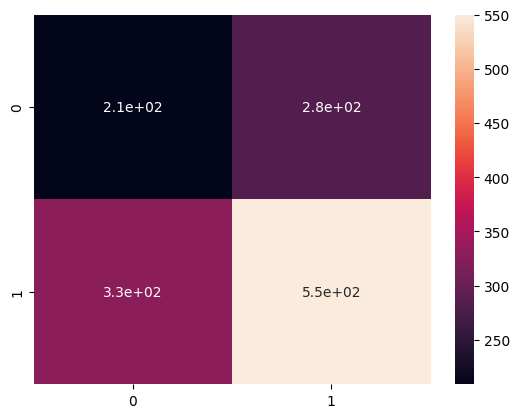

In [42]:
sns.heatmap(cm, annot=True)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41       491
           1       0.66      0.63      0.64       879

    accuracy                           0.55      1370
   macro avg       0.52      0.53      0.52      1370
weighted avg       0.56      0.55      0.56      1370

